In [1]:
from rfgap import RFGAP
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
def generate_noisy_cubic_function(n_samples=100, noise_variance=1.0):
    """
    Generate a cubic function with additive Gaussian noise.

    Parameters:
    n_samples (int): The number of samples to generate.
    noise_variance (float): The variance of the Gaussian noise.

    Returns:
    np.array: The x values.
    np.array: The y values.
    """
    # Generate x values
    x = np.linspace(-3, 3, n_samples)

    # Generate y values without noise
    y_true = x**3

    # Generate Gaussian noise
    noise = np.random.normal(0, noise_variance, n_samples)

    # Add noise to y values
    y = y_true + noise

    return x, y, y_true

In [3]:
x, y_noise, y = generate_noisy_cubic_function(n_samples=500, noise_variance=0)

In [4]:
rf = RFGAP(prediction_type = 'regression', oob_score = mean_squared_error)
rf.fit(x.reshape(-1, 1), y)

In [5]:
pse = rf.oob_prediction_intervals(y, alpha = 0.05)

In [6]:
np.max(pse)

1.0062027625936

In [7]:
np.min(pse)

3.7825000624293414e-05

<ErrorbarContainer object of 3 artists>

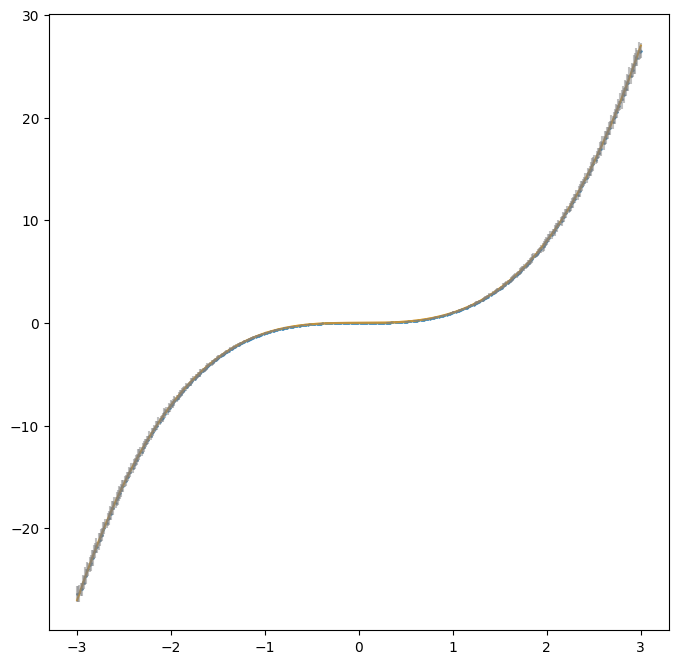

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(x, rf.oob_prediction_, label='OOB Predictions', s = 0.5)
plt.plot(x, y, label='True function', color='orange')
plt.errorbar(x, rf.oob_prediction_, pse, c = 'gray', alpha = 0.5)

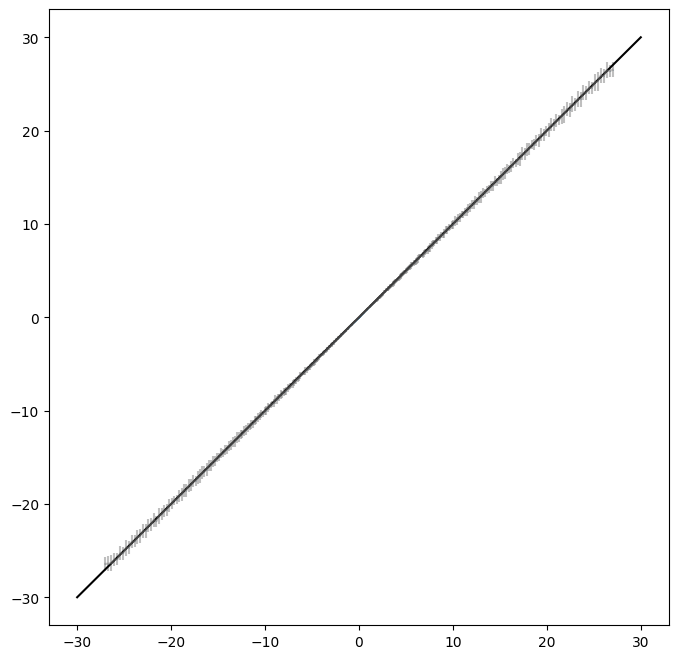

In [14]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x = y, y = rf.oob_prediction_, s = 0.2)
plt.errorbar(y, rf.oob_prediction_, pse, c = 'gray', alpha = 0.5)
plt.plot(np.linspace(-30, 30), np.linspace(-30, 30), c = 'black')